In [1]:
# Comparing share price of big 4 banks

In [12]:
import pandas_datareader.data as web
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
start = '2020-01-01'
end = date.today()

In [21]:
# using DataReader
anz = web.DataReader('ANZ.AX', 'yahoo', start, end)
cba = web.DataReader('CBA.AX', 'yahoo', start, end)
nab = web.DataReader('NAB.AX', 'yahoo', start, end)
wbc = web.DataReader('WBC.AX', 'yahoo', start, end)

In [9]:
# using yf
data_yf = yf.download('ANZ.AX, CBA.AX, NAB.AX, WBC.AX', start=start, end=end)
data_yf.head(2)

[*********************100%***********************]  4 of 4 completed


Adj Close                                       Close             \
               ANZ.AX     CBA.AX     NAB.AX     WBC.AX     ANZ.AX     CBA.AX   
Date                                                                           
2020-01-02  23.783648  77.023911  23.803553  23.788561  24.549999  79.879997   
2020-01-03  23.958029  77.438530  23.948874  23.955738  24.730000  80.309998   

                                       High             ...    Low         \
               NAB.AX     WBC.AX     ANZ.AX     CBA.AX  ... NAB.AX WBC.AX   
Date                                                    ...                 
2020-01-02  24.570000  24.190001  24.600000  80.220001  ...  24.43  24.09   
2020-01-03  24.719999  24.360001  24.940001  81.190002  ...  24.66  24.33   

                 Open                                Volume                    \
               ANZ.AX     CBA.AX NAB.AX     WBC.AX   ANZ.AX   CBA.AX   NAB.AX   
Date                                                                            
2020-01-02  24.440001  79.790001  24.50  24.110001  2804051  1416232  3066508   
2020-01-03  24.709999  80.970001  24.93  24.500000  3403316  1622784  3142425   

                     
             WBC.AX  
Date                 
2020-01-02  3566294  
2020-01-03  4519868  

[2 rows x 24 columns]

In [10]:
cba_yf = yf.Ticker('CBA.AX')

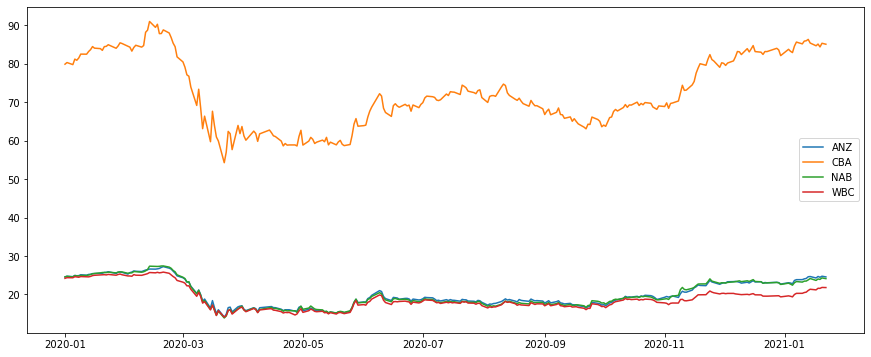

In [22]:
# plotting the share price
plt.figure(figsize=(15,6))
plt.plot(anz['Close'], label='ANZ')
plt.plot(cba['Close'], label='CBA')
plt.plot(nab['Close'], label='NAB')
plt.plot(wbc['Close'], label='WBC')
plt.legend()


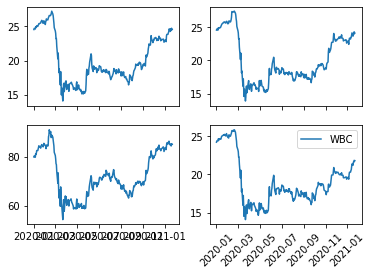

In [32]:
fig, axs = plt.subplots(2,2, sharex=True)
axs[0,0].plot(anz['Close'], label='ANZ')
axs[1,0].plot(cba['Close'], label='CBA')
axs[0,1].plot(nab['Close'], label='NAB')
axs[1,1].plot(wbc['Close'], label='WBC')
plt.xticks(rotation=45)
plt.legend()

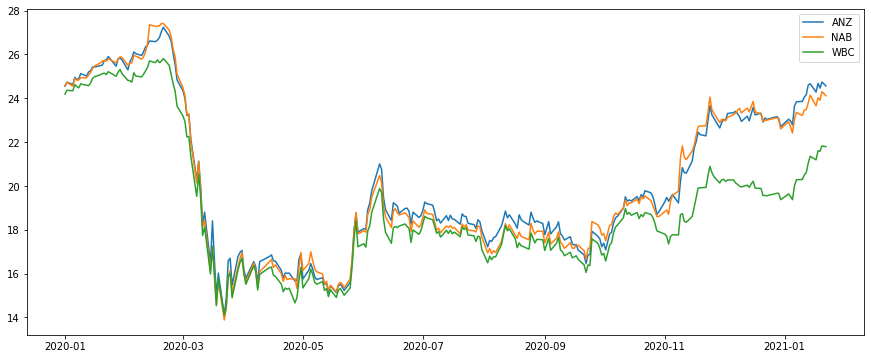

In [33]:
# plot excluding cba 
plt.figure(figsize=(15,6))
plt.plot(anz['Close'], label='ANZ')
plt.plot(nab['Close'], label='NAB')
plt.plot(wbc['Close'], label='WBC')
plt.legend()


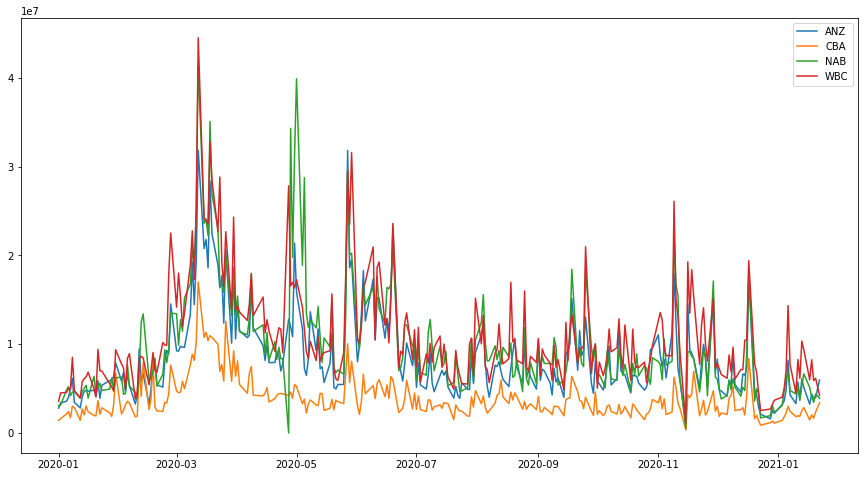

In [36]:
# volume traded
plt.figure(figsize=(15,8))
plt.plot(anz['Volume'], label='ANZ')
plt.plot(cba['Volume'], label='CBA')
plt.plot(nab['Volume'], label='NAB')
plt.plot(wbc['Volume'], label='WBC')
plt.legend()

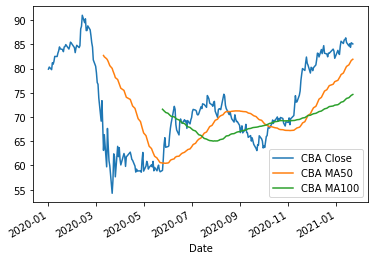

In [37]:
# moving averages 
cba['MA50'] = cba['Close'].rolling(50).mean()
cba['MA100'] = cba['Close'].rolling(100).mean()
cba['Close'].plot(label='CBA Close')
cba['MA50'].plot(label='CBA MA50')
cba['MA100'].plot(label='CBA MA100')
plt.legend()

In [39]:
# Daily percentage change
anz['returns'] = (anz['Close']/anz['Close'].shift(1))-1
cba['returns'] = (cba['Close']/cba['Close'].shift(1))-1
nab['returns'] = (nab['Close']/nab['Close'].shift(1))-1
wbc['returns'] = (wbc['Close']/wbc['Close'].shift(1))-1
cba.head()

,High,Low,Open,Close,Volume,Adj Close,MA50,MA100,returns
Date,,,,,,,,,
2020-01-01,80.220001,79.389999,79.790001,79.879997,1416232.0,77.023911,NaN,NaN,NaN
2020-01-02,81.190002,80.250000,80.970001,80.309998,1622784.0,77.438530,NaN,NaN,0.005383
2020-01-05,79.879997,79.230003,79.730003,79.769997,2129260.0,76.917847,NaN,NaN,-0.006724
2020-01-06,81.199997,80.180000,80.820000,81.199997,2417468.0,78.296707,NaN,NaN,0.017927
2020-01-07,81.250000,80.029999,81.220001,80.900002,1719114.0,78.007446,NaN,NaN,-0.003695


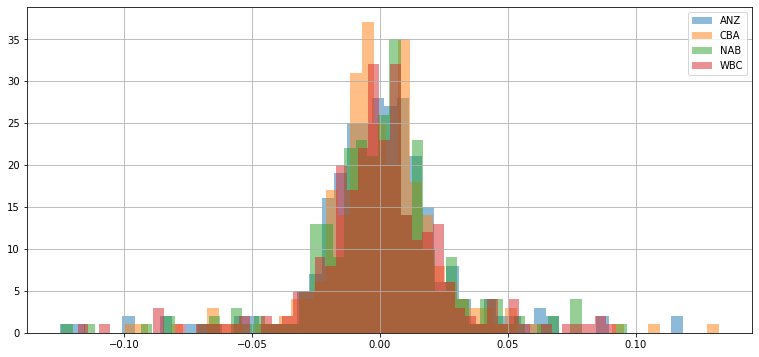

In [43]:
plt.figure(figsize=(13,6))
anz['returns'].hist(bins=50, label='ANZ', alpha=.5)
cba['returns'].hist(bins=50, label='CBA', alpha=.5)
nab['returns'].hist(bins=50, label='NAB', alpha=.5)
wbc['returns'].hist(bins=50, label='WBC', alpha=.5)
plt.legend()

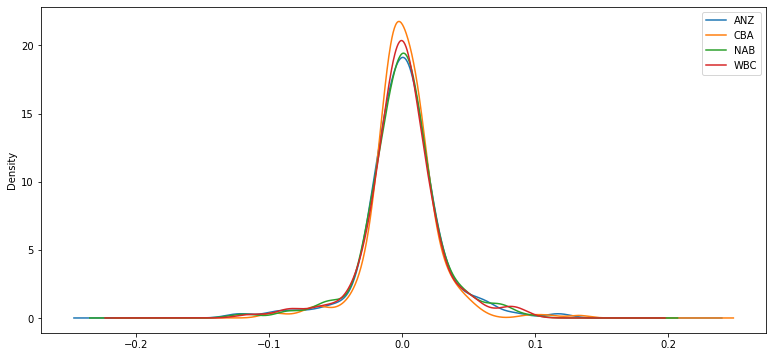

In [45]:
plt.figure(figsize=(13,6))
anz['returns'].plot(kind='kde', label='ANZ')
cba['returns'].plot(kind='kde', label='CBA')
nab['returns'].plot(kind='kde', label='NAB')
wbc['returns'].plot(kind='kde', label='WBC')
plt.legend()

In [47]:
# Cumulative return
anz['cumulative return'] = (1 + anz['returns']).cumprod()
cba['cumulative return'] = (1 + cba['returns']).cumprod()
nab['cumulative return'] = (1 + nab['returns']).cumprod()
wbc['cumulative return'] = (1 + wbc['returns']).cumprod()

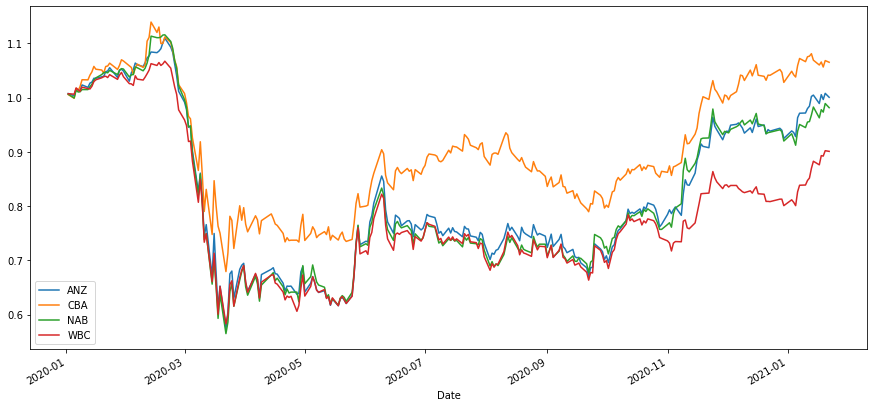

In [49]:
anz['cumulative return'].plot(label='ANZ', figsize=(15,7))
cba['cumulative return'].plot(label='CBA', figsize=(15,7))
nab['cumulative return'].plot(label='NAB', figsize=(15,7))
wbc['cumulative return'].plot(label='WBC', figsize=(15,7))

plt.legend()
